# What *drugs/compounds* target gene products of gene "coagulation factor II, thrombin"?

In [54]:
!pip install SPARQLWrapper pandas --quiet
from SPARQLWrapper import SPARQLWrapper, JSON, XML, CSV, TSV
import pandas as pd, io
from pandas.io.json import json_normalize
from IPython.core.display import display, HTML
%matplotlib inline

The NCATS Translator [Red team knowledge graph](http://graphdb.dumontierlab.com/repositories/ncats-red-kg) is used to answer the question. It integrates the following datasets:
* HGNC: genes
* DrugBank: drugs, drug-protein and drug-drug interactions
* PrePPI: protein-protein interactions
* BioGRID: protein-protein interactions with evidences
* WikiPathways: pathways, gene-gene interactions
* DATE: link drugs to pathways
* GOTE: link proteins to pathways

The SPARQL queries used to transform the datasets to the [BioLink model](https://biolink.github.io/biolink-model/docs/) can be found [here](https://github.com/vemonet/data2services-insert/tree/master/insert-biolink).

In [55]:
gene = "coagulation factor II, thrombin"

sparql = SPARQLWrapper("http://graphdb.dumontierlab.com/repositories/ncats-red-kg")
query = """
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX bl: <http://w3id.org/biolink/vocab/>
SELECT distinct ?gene ?produceProteinUri ?affectedByDrug ?byRelation ?inInteraction ?inGraph
{
  ?geneUri a bl:Gene ;
    bl:id ?geneId ; 
    bl:name ?gene ;
    bl:has_gene_product ?produceProteinUri .
  OPTIONAL { ?geneProductUri bl:name ?produceProtein . }
  ?geneProductUri a bl:GeneProduct .
  GRAPH ?inGraph {
      ?inInteraction ?associationSubject ?geneProductUri ;
       ?associationObject ?drugUri ;
       bl:relation ?byRelation .
   }
  ?drugUri a bl:ChemicalSubstance .
  OPTIONAL {?drugUri bl:name ?affectedByDrug .}
  FILTER regex(str(?gene), "%s") . 
} limit 100
"""

sparql.setQuery(query % (gene))
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
# Load JSON in flat pandas dataframe:
table = json_normalize(results["results"]["bindings"])

In [56]:
table.head()

,affectedByDrug.type,affectedByDrug.value,byRelation.type,byRelation.value,gene.type,gene.value,inGraph.type,inGraph.value,inInteraction.type,inInteraction.value,produceProteinUri.type,produceProteinUri.value
0,literal,menadione,uri,http://w3id.org/biolink/vocab/interacts_with,literal,"coagulation factor II, thrombin",uri,https://w3id.org/data2services/graph/biolink/date,uri,https://w3id.org/data2services/data/protein/in...,uri,http://identifiers.org/uniprot/P00734
1,literal,menadione,uri,http://w3id.org/biolink/vocab/interacts_with,literal,"coagulation factor II, thrombin",uri,https://w3id.org/data2services/graph/biolink/date,uri,https://w3id.org/data2services/data/protein/in...,uri,http://identifiers.org/uniprot/P00734
2,literal,menadione,uri,http://w3id.org/biolink/vocab/interacts_with,literal,"coagulation factor II, thrombin",uri,https://w3id.org/data2services/graph/biolink/date,uri,https://w3id.org/data2services/data/protein/in...,uri,http://identifiers.org/uniprot/P00734
3,literal,menadione,uri,http://w3id.org/biolink/vocab/interacts_with,literal,"coagulation factor II, thrombin",uri,https://w3id.org/data2services/graph/biolink/date,uri,https://w3id.org/data2services/data/protein/in...,uri,http://identifiers.org/uniprot/P00734
4,literal,Pf,uri,http://w3id.org/biolink/vocab/interacts_with,literal,"coagulation factor II, thrombin",uri,https://w3id.org/data2services/graph/biolink/date,uri,https://w3id.org/data2services/data/protein/in...,uri,http://identifiers.org/uniprot/P00734


In [ ]:
affectedbydrug = table.groupby('affectedByDrug.value').count()['affectedByDrug.type'].reset_index()

In [44]:
import matplotlib.pyplot as plt

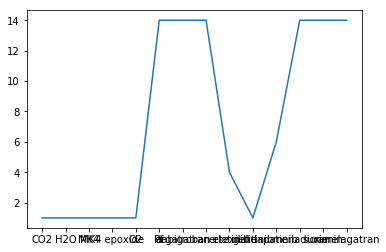

In [46]:
plt.plot(affectedbydrug['affectedByDrug.value'], affectedbydrug['affectedByDrug.type'])